#Workshop - Decision Trees
This workshop deals with understanding the working of decision trees.
##Author: Lajmi Syrine

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/Iris (1).csv")
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
print(df.shape)

print(df.info())

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df[["Species"]].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
#identify the data into x and y
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
print(x[0:5])
y=df['Species']
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [27]:
#Slipt the data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
#Modeling
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

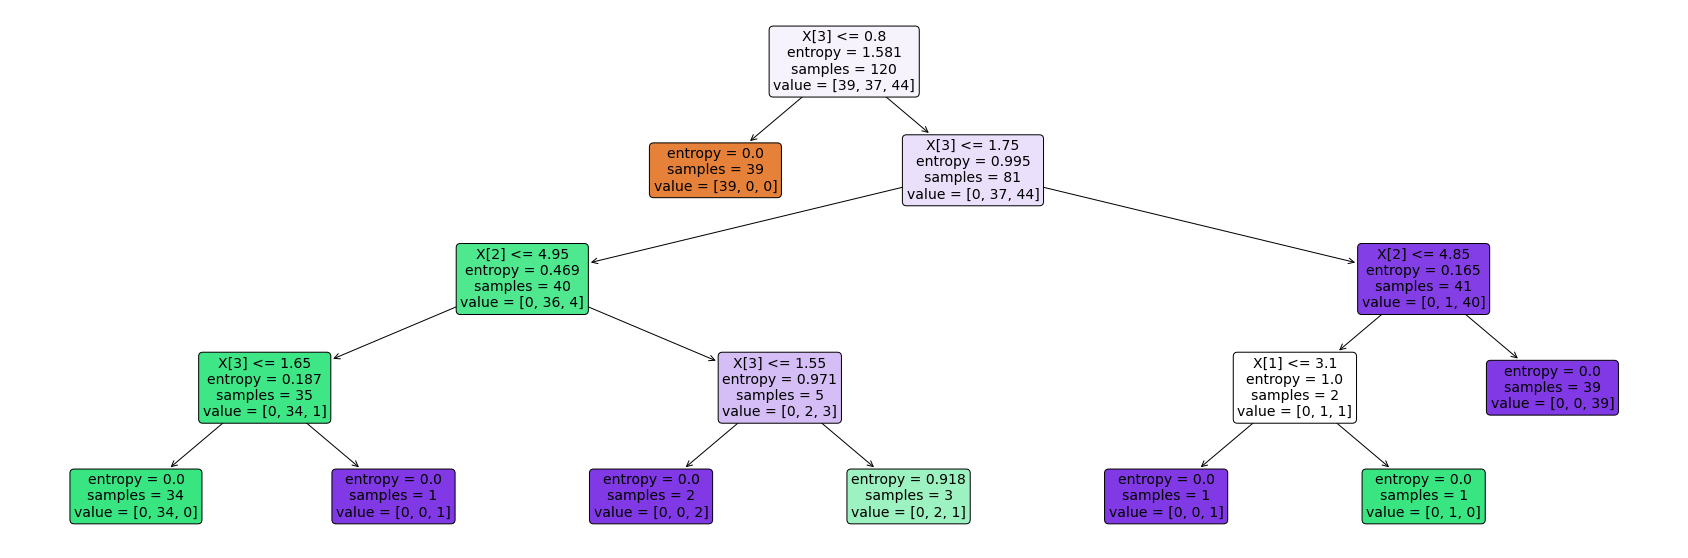

In [29]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(Tree,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [30]:
#Predection
pred=Tree.predict(x_test)
print(pred[0:9])
print(y_test[0:9])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor']
114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object


In [31]:
#Evaluation
from sklearn import metrics
print("Accuracy of the Decision Tree:", metrics.accuracy_score(y_test,pred))


Accuracy of the Decision Tree: 1.0


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



So, as a conclusion we can tell that the model of Decision Tree is a good model for this data since the accuracy is:1 whichi is good accuracy

In [34]:
#Test with new data
species=['setosa','versicolor','virginica']
print('Class Names : ',species,"\n")
print('Enter the following values :')
sepal_length=float(input('Enter Sepal Length : '))
sepal_width =float(input('Enter Sepal Width  : '))
petal_length=float(input('Enter Petal Length : '))
petal_width =float(input('Enter Petal Width  : '))
print(f'\nEstimating the species Prediction.....')
output = Tree.predict([[sepal_length, sepal_width,petal_length,petal_width]])
# output = Tree.predict([[5.1, 3.4,1.4,0.2]])
print('Output : ',output[0])

Class Names :  ['setosa', 'versicolor', 'virginica'] 

Enter the following values :
Enter Sepal Length : 5.1
Enter Sepal Width  : 3.4
Enter Petal Length : 1.4
Enter Petal Width  : 0.2

Estimating the species Prediction.....
Output :  Iris-setosa
